In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
taxi = pd.read_csv('clean_taxi.csv')

In [3]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83691 entries, 0 to 83690
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               83691 non-null  float64
 1   lpep_pickup_datetime   83691 non-null  object 
 2   lpep_dropoff_datetime  83691 non-null  object 
 3   store_and_fwd_flag     83691 non-null  object 
 4   RatecodeID             83691 non-null  float64
 5   PULocationID           83691 non-null  int64  
 6   DOLocationID           83691 non-null  int64  
 7   passenger_count        83691 non-null  float64
 8   trip_distance          83691 non-null  float64
 9   fare_amount            83691 non-null  float64
 10  extra                  83691 non-null  float64
 11  mta_tax                83691 non-null  float64
 12  tip_amount             83691 non-null  float64
 13  tolls_amount           83691 non-null  float64
 14  improvement_surcharge  83691 non-null  float64
 15  to

In [4]:
taxi.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.50,0.5,0.00,0.0,0.3,7.30,2.0,1.0,0.00
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.50,0.5,0.00,0.0,0.3,43.30,2.0,1.0,0.00
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.50,0.5,2.34,0.0,0.3,10.14,1.0,1.0,0.00
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.50,0.5,0.00,0.0,0.3,7.80,2.0,1.0,0.00
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.50,0.5,0.00,0.0,0.3,8.30,2.0,1.0,0.00
5,1.0,2021-07-01 00:05:00,2021-07-01 00:11:50,N,1.0,24,239,1.0,1.90,8.0,3.25,0.5,3.00,0.0,0.3,15.05,1.0,1.0,2.75
6,2.0,2021-07-01 00:57:14,2021-07-01 01:27:43,N,1.0,75,243,1.0,0.00,17.5,0.50,0.5,0.00,0.0,0.3,18.80,2.0,1.0,0.00
7,2.0,2021-07-01 00:27:36,2021-07-01 00:32:35,N,1.0,82,82,1.0,0.66,5.0,0.50,0.5,0.00,0.0,0.3,6.30,2.0,1.0,0.00
8,2.0,2021-07-01 00:29:09,2021-07-01 00:34:18,N,1.0,74,42,1.0,1.72,7.0,0.50,0.5,2.08,0.0,0.3,10.38,1.0,1.0,0.00
9,2.0,2021-07-01 00:41:33,2021-07-01 00:49:24,N,1.0,41,42,1.0,1.37,7.5,0.50,0.5,0.00,0.0,0.3,8.80,2.0,1.0,0.00


In [5]:
taxi.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000,83691.000000
mean,1.908963,2.651563,108.362572,133.270005,1.188240,194.354699,20.412961,1.157928,0.295139,1.058875,0.624529,0.298756,24.233151,1.257865,1.409578,0.393247
std,0.287664,1.967298,70.370170,77.216791,0.784213,4405.549221,15.551241,1.366864,0.245893,2.368657,1.990481,0.019277,17.222411,0.449452,0.491759,0.962692
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,56.000000,69.000000,1.000000,1.350000,9.000000,0.000000,0.000000,0.000000,0.000000,0.300000,11.760000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,132.000000,1.000000,2.760000,16.000000,0.500000,0.500000,0.000000,0.000000,0.300000,19.800000,1.000000,1.000000,0.000000
75%,2.000000,5.000000,166.000000,205.000000,1.000000,6.200000,26.830000,2.750000,0.500000,1.660000,0.000000,0.300000,31.300000,2.000000,2.000000,0.000000
max,2.000000,5.000000,265.000000,265.000000,32.000000,260517.930000,480.000000,8.250000,0.500000,87.710000,30.050000,0.300000,480.310000,5.000000,2.000000,2.750000


In [6]:
taxi = taxi.drop(['VendorID','trip_type'], axis=1)

In [7]:
len(taxi[taxi['total_amount'] <= 0])

249

In [8]:
taxi = taxi[taxi['total_amount'] > 0]

In [9]:
len(taxi[taxi['fare_amount'] <= 0])

50

In [10]:
taxi = taxi[taxi['fare_amount'] > 0]

In [11]:
len(taxi[taxi['trip_distance'] <= 0])

3336

Trip distance cannot be zero.

In [12]:
len(taxi[taxi['trip_distance'] >= 50])

235

Unlikely that a cab driver would drive more than 50 miles outside of Manhattan

In [13]:
taxi = taxi[taxi['trip_distance'] <= 50]

In [14]:
taxi.groupby('RatecodeID').median()['trip_distance']

RatecodeID
1.0     2.00
2.0    17.32
3.0     0.11
4.0    11.90
5.0     4.77
Name: trip_distance, dtype: float64

In [15]:
taxi['RatecodeID'].value_counts()

1.0    48883
5.0    34053
2.0      157
4.0       40
3.0       24
Name: RatecodeID, dtype: int64

In [16]:
taxi['trip_distance'].value_counts(ascending=False)

0.00     3336
1.40      505
1.60      406
1.00      382
1.10      382
         ... 
20.98       1
27.05       1
31.24       1
23.28       1
33.63       1
Name: trip_distance, Length: 2908, dtype: int64

<AxesSubplot:xlabel='RatecodeID', ylabel='trip_distance'>

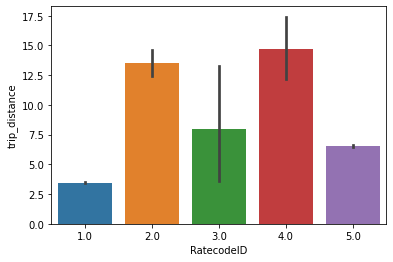

In [17]:
sns.barplot(x='RatecodeID', y='trip_distance', data=taxi[['RatecodeID','trip_distance']])

In [18]:
taxi['trip_distance'] = taxi.groupby(['RatecodeID'])['trip_distance'].apply(lambda x: x.replace(0,x.mean()))

In [19]:
len(taxi[taxi['trip_distance'] <= 0])

0

In [20]:
taxi.groupby('RatecodeID').median()['trip_distance']

RatecodeID
1.0     2.200
2.0    17.320
3.0     7.955
4.0    11.900
5.0     5.240
Name: trip_distance, dtype: float64

In [21]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83157 entries, 0 to 83690
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   83157 non-null  object 
 1   lpep_dropoff_datetime  83157 non-null  object 
 2   store_and_fwd_flag     83157 non-null  object 
 3   RatecodeID             83157 non-null  float64
 4   PULocationID           83157 non-null  int64  
 5   DOLocationID           83157 non-null  int64  
 6   passenger_count        83157 non-null  float64
 7   trip_distance          83157 non-null  float64
 8   fare_amount            83157 non-null  float64
 9   extra                  83157 non-null  float64
 10  mta_tax                83157 non-null  float64
 11  tip_amount             83157 non-null  float64
 12  tolls_amount           83157 non-null  float64
 13  improvement_surcharge  83157 non-null  float64
 14  total_amount           83157 non-null  float64
 15  pa

<AxesSubplot:xlabel='RatecodeID', ylabel='trip_distance'>

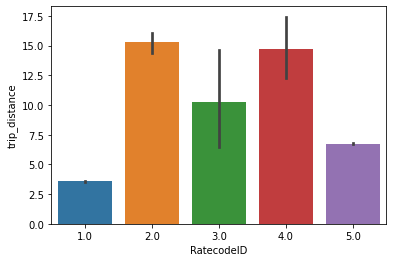

In [22]:
sns.barplot(x='RatecodeID', y='trip_distance', data=taxi[['RatecodeID','trip_distance']])

In [23]:
for i in taxi.columns[[0, 1]]:
    taxi[i] = pd.to_datetime(taxi[i])

In [24]:
taxi.head(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.200000,6.0,0.50,0.5,0.00,0.0,0.3,7.30,2.0,0.00
1,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.690000,42.0,0.50,0.5,0.00,0.0,0.3,43.30,2.0,0.00
2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.950000,6.5,0.50,0.5,2.34,0.0,0.3,10.14,1.0,0.00
3,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.240000,6.5,0.50,0.5,0.00,0.0,0.3,7.80,2.0,0.00
4,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.100000,7.0,0.50,0.5,0.00,0.0,0.3,8.30,2.0,0.00
5,2021-07-01 00:05:00,2021-07-01 00:11:50,N,1.0,24,239,1.0,1.900000,8.0,3.25,0.5,3.00,0.0,0.3,15.05,1.0,2.75
6,2021-07-01 00:57:14,2021-07-01 01:27:43,N,1.0,75,243,1.0,3.439464,17.5,0.50,0.5,0.00,0.0,0.3,18.80,2.0,0.00
7,2021-07-01 00:27:36,2021-07-01 00:32:35,N,1.0,82,82,1.0,0.660000,5.0,0.50,0.5,0.00,0.0,0.3,6.30,2.0,0.00
8,2021-07-01 00:29:09,2021-07-01 00:34:18,N,1.0,74,42,1.0,1.720000,7.0,0.50,0.5,2.08,0.0,0.3,10.38,1.0,0.00
9,2021-07-01 00:41:33,2021-07-01 00:49:24,N,1.0,41,42,1.0,1.370000,7.5,0.50,0.5,0.00,0.0,0.3,8.80,2.0,0.00


In [25]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83157 entries, 0 to 83690
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   83157 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  83157 non-null  datetime64[ns]
 2   store_and_fwd_flag     83157 non-null  object        
 3   RatecodeID             83157 non-null  float64       
 4   PULocationID           83157 non-null  int64         
 5   DOLocationID           83157 non-null  int64         
 6   passenger_count        83157 non-null  float64       
 7   trip_distance          83157 non-null  float64       
 8   fare_amount            83157 non-null  float64       
 9   extra                  83157 non-null  float64       
 10  mta_tax                83157 non-null  float64       
 11  tip_amount             83157 non-null  float64       
 12  tolls_amount           83157 non-null  float64       
 13  i

In [26]:
le = LabelEncoder()

In [27]:
taxi['store_and_fwd_flag'] = le.fit_transform(taxi['store_and_fwd_flag'])
taxi.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,congestion_surcharge
0,2021-07-01 00:30:52,2021-07-01 00:35:36,0,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,0.3,7.30,2.0,0.0
1,2021-07-01 00:25:36,2021-07-01 01:01:31,0,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,0.3,43.30,2.0,0.0
2,2021-07-01 00:05:58,2021-07-01 00:12:00,0,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,0.3,10.14,1.0,0.0
3,2021-07-01 00:41:40,2021-07-01 00:47:23,0,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,0.3,7.80,2.0,0.0
4,2021-07-01 00:51:32,2021-07-01 00:58:46,0,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,0.0


In [28]:
taxi['fare_amount'].describe()

count    83157.000000
mean        20.448919
std         15.451124
min          0.010000
25%          9.000000
50%         16.000000
75%         26.830000
max        480.000000
Name: fare_amount, dtype: float64

In [29]:
taxi = taxi[taxi['fare_amount'] <= 200]

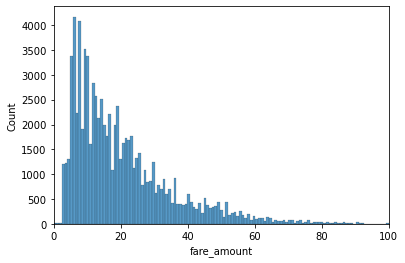

In [30]:
fig, ax = plt.subplots()
sns.histplot(taxi['fare_amount'], ax=ax)
ax.set_xlim(0,100)
plt.show()

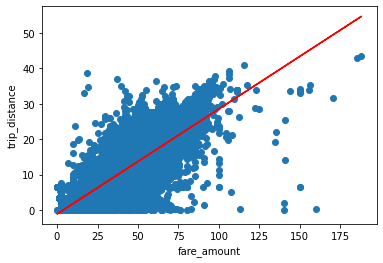

In [31]:
x = taxi['fare_amount']
y = taxi['trip_distance']

plt.scatter(x, y)
plt.xlabel('fare_amount')
plt.ylabel('trip_distance')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red')

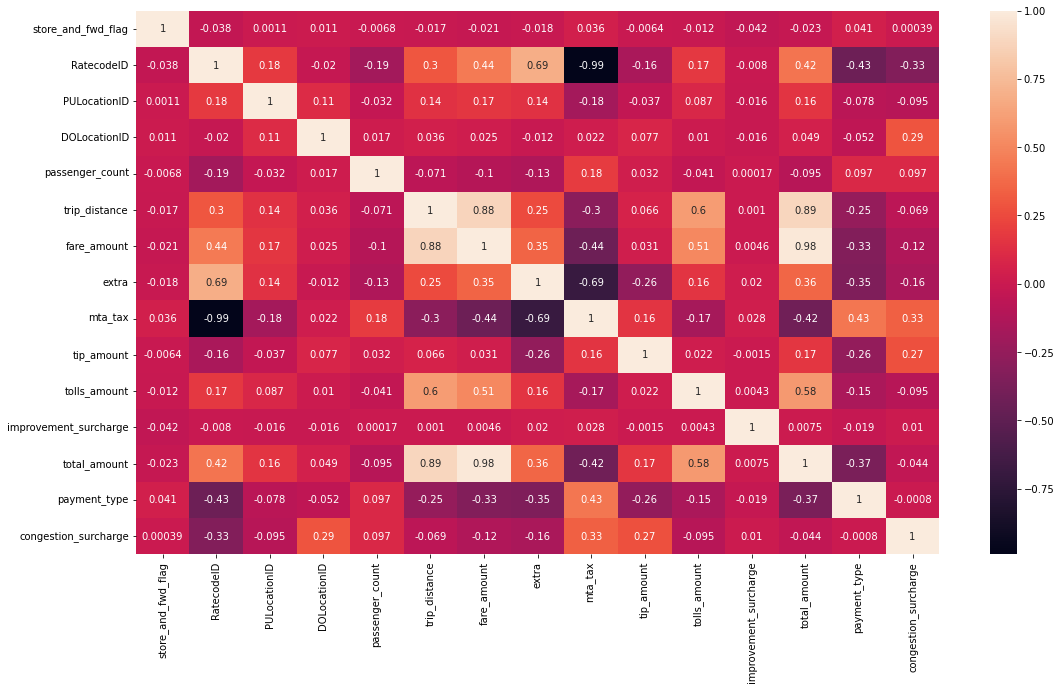

In [32]:
plt.figure(figsize=(18, 10))
sns.heatmap(taxi.corr(), annot=True);

Noteable correlations (ADJUSTED):
- total_amount & fare_amount = 0.98
- total_amount & trip_distance = 0.89
- trip_distance & fare_amount = 0.88
- RatecodeID & extra = 0.69
- tolls_amount & trip_distance = 0.6
- tolls_amount & total_amount = 0.58
- tolls_amount & fare_amount = 0.5
- Ratecode ID & fare_amount = 0.44
- RatecodeID & total_amount = 0.42
- congestion_surcharge & tip_amount = 0.27
- payment_type & tip_amount = -0.26
- payment_type & total_amount = -0.37
- mta_tax & extra = -0.69
- RatecodeID & mta_tax = -0.99

In [33]:
taxi['day_of_the_week'] = taxi['lpep_pickup_datetime'].dt.day_name()

<AxesSubplot:xlabel='count', ylabel='day_of_the_week'>

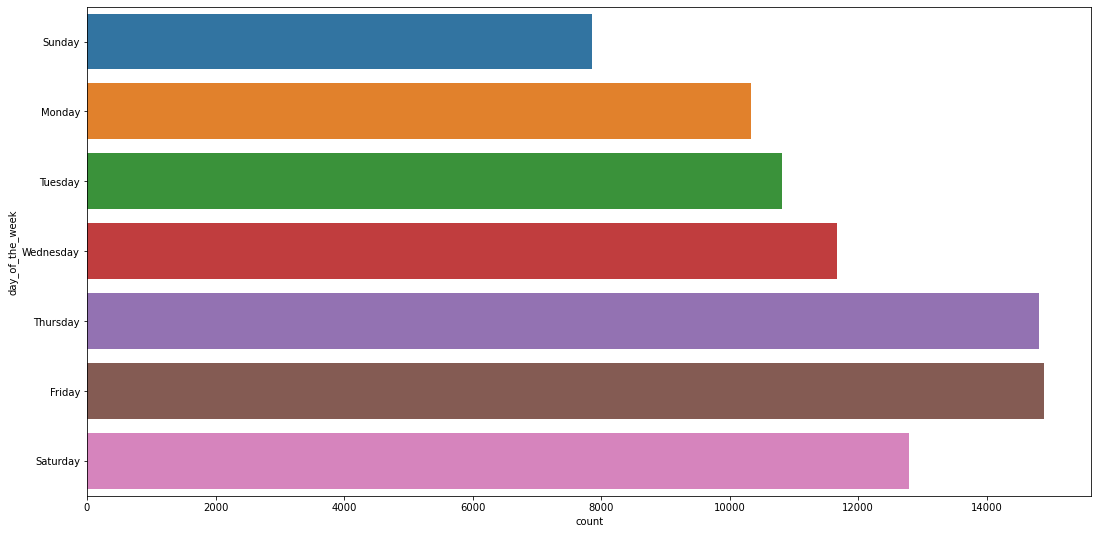

In [34]:
plt.figure(figsize=(18,9))
sns.countplot(y='day_of_the_week', data=taxi, order=('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

Text(0.5, 0, 'Hour of the Day')

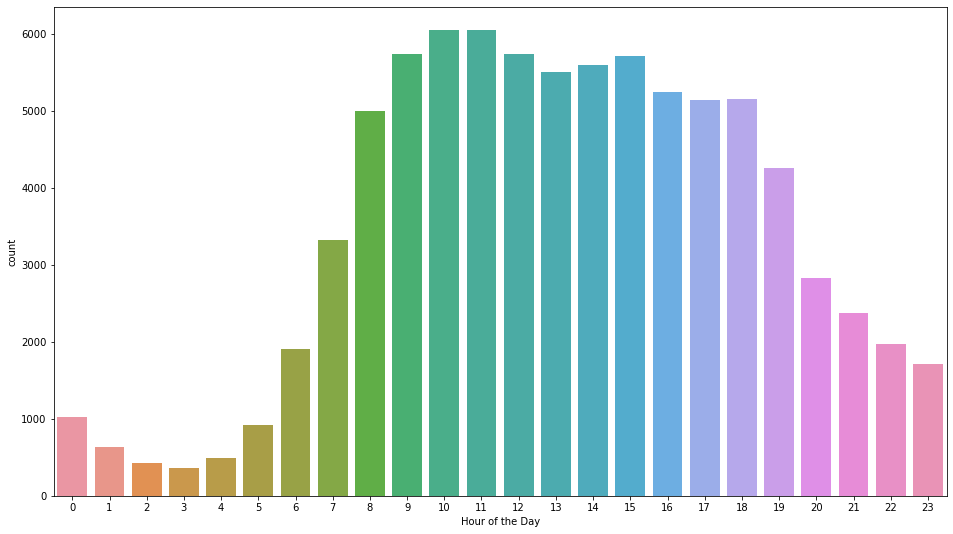

In [35]:
plt.figure(figsize=(16,9))
sns.countplot(x=taxi['lpep_pickup_datetime'].dt.hour, data=taxi)
plt.xlabel('Hour of the Day')

In [36]:
for i in taxi.columns[[0, 1]]:
    taxi[i] = pd.to_numeric(taxi[i])

In [37]:
X = taxi.drop('total_amount', axis=1)
y = taxi.total_amount

In [38]:
X = pd.get_dummies(data=X)
y = pd.get_dummies(data=y)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=123)

In [40]:
X_train.dtypes

lpep_pickup_datetime           int64
lpep_dropoff_datetime          int64
store_and_fwd_flag             int64
RatecodeID                   float64
PULocationID                   int64
DOLocationID                   int64
passenger_count              float64
trip_distance                float64
fare_amount                  float64
extra                        float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
improvement_surcharge        float64
payment_type                 float64
congestion_surcharge         float64
day_of_the_week_Friday         uint8
day_of_the_week_Monday         uint8
day_of_the_week_Saturday       uint8
day_of_the_week_Sunday         uint8
day_of_the_week_Thursday       uint8
day_of_the_week_Tuesday        uint8
day_of_the_week_Wednesday      uint8
dtype: object

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
scaler.fit_transform(X_train)

array([[ 0.26604981,  0.26628342, -0.04622873, ..., -0.46615138,
        -0.38593316, -0.4041345 ],
       [ 0.52471201,  0.52448348, -0.04622873, ..., -0.46615138,
        -0.38593316, -0.4041345 ],
       [ 0.14921487,  0.149001  , -0.04622873, ..., -0.46615138,
         2.59112228, -0.4041345 ],
       ...,
       [-0.16572498, -0.16618293, -0.04622873, ..., -0.46615138,
        -0.38593316, -0.4041345 ],
       [ 0.04366329,  0.04342849, -0.04622873, ..., -0.46615138,
        -0.38593316, -0.4041345 ],
       [-0.2166746 , -0.21705681, -0.04622873, ..., -0.46615138,
        -0.38593316, -0.4041345 ]])

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [44]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [45]:
lr.fit(X_train, y_train)
lin_pred = lr.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(lin_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, lin_pred))

Root Mean Squared Error: 0.014723844045650638
R-Squared: 0.0005002054971349405


In [46]:
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(dt_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, dt_pred))

Root Mean Squared Error: 0.00878704952524333
R-Squared: 0.35217710077045294


In [47]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(knn_pred, y_test)))
print('R-Squared:', metrics.r2_score(y_test, knn_pred))

Root Mean Squared Error: 0.01611586702310151
R-Squared: -0.021194902701018


The most accurate model is the Decision Tree Regressor with the RMSE value of 0.008 and a R2 value of 0.35